# Homework: Regression

In [1]:
# Import Library
import pandas as pd
import numpy as np

## Data Preparation

In [2]:
# read csv
df = pd.read_csv('Homework_Dataset.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
for col in df.columns:
    print(f'column name ==> {col}')
    print(f'10 unique values ==> {df[col].unique()[:10]}')
    print(f'number of unique values ===> {df[col].nunique()}\n\n')


column name ==> id
10 unique values ==> [2539 2595 3647 3831 5022 5099 5121 5178 5203 5238]
number of unique values ===> 48895


column name ==> name
10 unique values ==> ['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park'
 'Large Cozy 1 BR Apartment In Midtown East' 'BlissArtsSpace!'
 "Large Furnished Room Near B'way " 'Cozy Clean Guest Room - Family Apt'
 'Cute & Cozy Lower East Side 1 bdrm']
number of unique values ===> 47905


column name ==> host_id
10 unique values ==> [2787 2845 4632 4869 7192 7322 7356 8967 7490 7549]
number of unique values ===> 37457


column name ==> host_name
10 unique values ==> ['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura' 'Chris' 'Garon'
 'Shunichi' 'MaryEllen' 'Ben']
number of unique values ===> 11452


column name ==> neighbourhood_group
10 unique values ==> ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings.pop() # remove last reviews column becasue it's a date
strings

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

In [6]:
# change all values in object columns into lowercase & replace space with underscore

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

## Exploring Data

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


### See the distribution of price

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

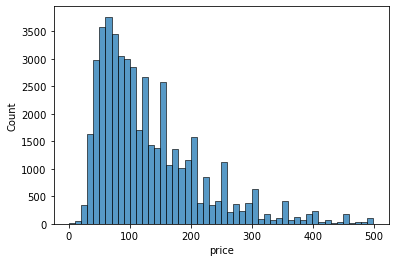

In [16]:
sns.histplot(df.price[df.price < 500], bins=50)
# data has a long-tail

In [17]:
# get rid of long tail
price_log = np.log1p(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

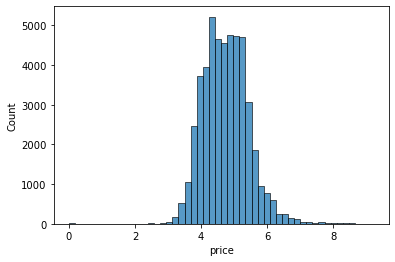

In [21]:
# plot after get rid of long tail
sns.histplot(price_log, bins=50)

### Missing values

In [22]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [101]:
# select only columns that we'll use

new_df = df.loc[:, ['latitude',
                    'longitude',
                    'price',
                    'minimum_nights',
                    'number_of_reviews',
                    'reviews_per_month',
                    'calculated_host_listings_count',
                    'availability_365']]
new_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


#### Question 1: Find a feature with missing values. How many missing values does it have?

In [27]:
new_df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Question 2: What's the median (50% percentile) for variable 'minimum_nights'?

In [28]:
df['minimum_nights'].median()

3.0

## Split the Dataset

In [55]:
# Shuffle the initial dataset, use seed 42
# shuffle array of index from dataset, but not shuffle the dataset itself
len_df = len(new_df)

idx = np.arange(len_df)
np.random.seed(42)
np.random.shuffle(idx)

In [56]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution

# Find out the number of 60:20:20 distribution
n_validate = int(len_df * 0.2)
n_test = int(len_df * 0.2)
n_train = len_df - n_validate - n_test

print(len_df, n_train, n_validate, n_test)

48895 29337 9779 9779


In [59]:
# Split dataset
df_train = new_df.iloc[idx[:n_train]]
df_validate = new_df.iloc[idx[n_train:n_train+n_validate]]
df_test = new_df.iloc[idx[n_train+n_validate:]]

In [61]:
print(len(df_train), len(df_validate), len(df_test))

29337 9779 9779


In [60]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [62]:
# reset index
df_train = df_train.reset_index(drop=True)
df_validate = df_validate.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [63]:
# Apply the log transformation to the price variable using the np.log1p() function.
y_train = np.log1p(df_train.price.values)
y_validate = np.log1p(df_validate.price.values)
y_test = np.log1p(df_test.price.values)

In [64]:
# Make sure that the target value ('price') is not in your dataframe
del df_train['price']
del df_validate['price']
del df_test['price']

#### Question 3: deal with missing value with 0 or mean?

In [67]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [68]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [77]:
# fill NaN with 0
def prepare_X1(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

features = list(new_df.columns)
features.remove('price')

In [78]:
# Train model & NaN = 0

X_train_m0 = prepare_X1(df_train)
w0, w = train_linear_regression(X_train_m0, y_train)

X_validate = prepare_X1(df_validate)
y_pred_m0 = w0 + X_validate.dot(w)

rmse_m0 = rmse(y_validate, y_pred_m0)
round(rmse_m0, 2)


0.64

In [79]:
# fill NaN with mean
def prepare_X2(df):
    df_num = df[features]
    mean_X = df.mean(axis=0)
    df_num = df_num.fillna(mean_X)
    X = df_num.values
    return X

features = list(new_df.columns)
features.remove('price')

In [88]:
# Train model & NaN = mean

X_train_mean = prepare_X2(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_validate = prepare_X2(df_validate)
y_pred_mean = w0 + X_validate.dot(w)

rmse_mean = rmse(y_validate, y_pred_mean)
round(rmse_mean, 2)


0.64

## Regilarization

#### Question 4: Which gives the best RMSE?

In [117]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [98]:
def calrmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [100]:
# find out which r gives the best RMSE

r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_list:
    X_train = prepare_X1(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_validate = prepare_X1(df_validate)
    y_pred = w0 + X_validate.dot(w)
    rmse = calrmse(y_validate, y_pred)

    print(f'r values: {r} ===> RMSE is {round(rmse, 2)}')

r values: 0 ===> RMSE is 0.64
r values: 1e-06 ===> RMSE is 0.64
r values: 0.0001 ===> RMSE is 0.64
r values: 0.001 ===> RMSE is 0.64
r values: 0.01 ===> RMSE is 0.66
r values: 0.1 ===> RMSE is 0.68
r values: 1 ===> RMSE is 0.68
r values: 5 ===> RMSE is 0.68
r values: 10 ===> RMSE is 0.68


## Seed and Standard Deviation

#### Question 5: find the standard deviation from different seed

** **Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.**

In [110]:
def seed_random(df, seed):
    len_df = len(df)
    idx = np.arange(len_df)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_validate = int(len_df * 0.2)
    n_test = int(len_df * 0.2)
    n_train = len_df - n_validate - n_test

    return n_train, n_validate, n_test, idx

In [111]:
def splitdataset(df, n_train, n_validate, n_test, idx):
    df_train = df.iloc[idx[:n_train]]
    df_validate = df.iloc[idx[n_train:n_train+n_validate]]
    df_test = df.iloc[idx[n_train+n_validate:]]

    df_train = df_train.reset_index(drop=True)
    df_validate = df_validate.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.price.values)
    y_validate = np.log1p(df_validate.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_validate['price']
    del df_test['price']

    return df_train, df_validate, df_test, y_train, y_validate, y_test


In [116]:
# fill NaN with 0
def prepare_X1(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

features = list(new_df.columns)
features.remove('price')

In [114]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seed_list:
    n_train, n_validate, n_test, idx = seed_random(new_df, seed)
    df_train, df_validate, df_test, y_train, y_validate, y_test = splitdataset(new_df, n_train, n_validate, n_test, idx)

    X_train = prepare_X1(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_validate = prepare_X1(df_validate)
    y_pred = w0 + X_validate.dot(w)
    rmse = calrmse(y_validate, y_pred)
    rmse_list.append(rmse)

    print(f'seed: {seed} ===> RMSE is {round(rmse, 2)}')

seed_std = np.std(rmse_list)
print(round(seed_std, 3))
    

seed: 0 ===> RMSE is 0.65
seed: 1 ===> RMSE is 0.65
seed: 2 ===> RMSE is 0.65
seed: 3 ===> RMSE is 0.64
seed: 4 ===> RMSE is 0.64
seed: 5 ===> RMSE is 0.63
seed: 6 ===> RMSE is 0.63
seed: 7 ===> RMSE is 0.65
seed: 8 ===> RMSE is 0.65
seed: 9 ===> RMSE is 0.64
0.008


## Apply on Test Set

#### Question 6: RMSE from Test set

In [121]:
n_train, n_validate, n_test, idx = seed_random(new_df, 9)
df_train, df_validate, df_test, y_train, y_validate, y_test = splitdataset(new_df, n_train, n_validate, n_test, idx)

df_list = [df_train, df_validate]
df_combine = pd.concat(df_list)

y_list = [y_train, y_validate]
y_combine = np.concatenate(y_list)

X_combine = prepare_X1(df_combine)
w0, w = train_linear_regression_reg(X_combine, y_combine, r=0.001)

X_test = prepare_X1(df_test)
y_pred = w0 + X_test.dot(w)
rmse = calrmse(y_test, y_pred)
print(round(rmse, 2))


0.65
